In [4]:
import pandas as pd
import pickle
from pathlib import Path

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Load Datset

In [5]:
spam_df = pd.read_csv("../data/spam.csv", encoding="latin-1")
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Encode target labels

In [7]:
spam_df['class'] = spam_df['Category'].apply(lambda row: 0 if row == "ham" else 1)

spam_df.head()

,Category,Message,class
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


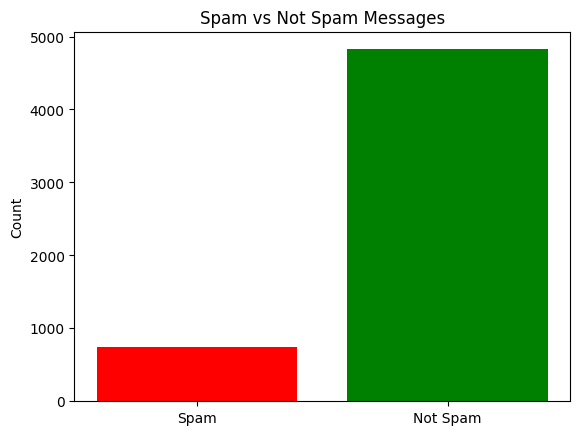

In [8]:
spam_count = (spam_df['class'] == 1).sum()
not_spam_count = (spam_df['class'] == 0).sum()

plt.bar(["Spam", "Not Spam"], [spam_count, not_spam_count], color=["red", "green"])
plt.title("Spam vs Not Spam Messages")
plt.ylabel("Count")
plt.show()

In [9]:
X = spam_df['Message']
y = spam_df['class']


In [10]:

cv = CountVectorizer()
X = cv.fit_transform(X)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 74225 stored elements and shape (5572, 8745)>

###  Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 8745), (1115, 8745), (4457,), (1115,))

### Train model

In [13]:
model = MultinomialNB()

model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


###  Evaluate Model

In [14]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9811659192825112

Confusion Matrix:
 [[954  12]
 [  9 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.92      0.94      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



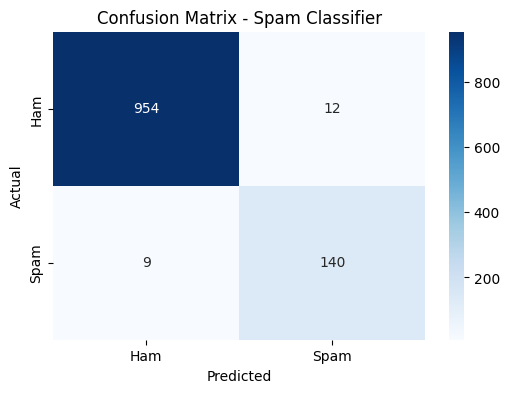

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            "Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Spam Classifier")
plt.show()

### Make prediction

In [16]:
def predict_message(message: str):
    vector = cv.transform([message])
    prediction = model.predict(vector)[0]

    return "Spam" if prediction == 1 else "Not Spam"


message = "Be the lucky winner of 1 million dollars by clicking on the following link https://mysite.org"
print(predict_message(message))

Spam


### Save model and Vectorizer

In [17]:
model_path = Path("models")
model_path.mkdir(exist_ok=True)


with open(f"{model_path}/spam_model_scikit.pkl", "wb") as f:
    pickle.dump(model, f)
    
    
with open(f"{model_path}/vectorizer.pkl", "wb") as f:
    pickle.dump(cv, f)

print("Artifacts saved")

Artifacts saved
